In [1]:
import pandas as pd 
import numpy as np

In [2]:
import tensorflow as tf
print(tf.__version__)
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2024-10-24 23:03:23.093809: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-24 23:03:23.298153: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-24 23:03:23.339299: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-24 23:03:23.560982: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-24 23:03:26.047864: W tensorflow/compiler/tf2

2.17.0


In [3]:
train_dir = '~/Documents/PGSoftwareLab/Project/MalnetImageClassification/archive/malnet-images-tiny/train'
test_dir = '~/Documents/PGSoftwareLab/Project/MalnetImageClassification/archive/malnet-images-tiny/test'
validation_dir = '~/Documents/PGSoftwareLab/Project/MalnetImageClassification/archive//malnet-images-tiny/val'

# Image data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1]
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'  # Handle borders after augmentation
)

test_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

# Load training data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # Resize all images to 224x224
    batch_size=32,
    class_mode='categorical'  # Since this is multi-class classification
)

# Load validation data
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Load test data
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Disable shuffling for consistent evaluation
)

Found 61201 images belonging to 43 classes.
Found 8743 images belonging to 43 classes.
Found 17486 images belonging to 43 classes.


In [4]:
print(train_generator.class_indices)
print(test_generator.class_indices)
print(validation_generator.class_indices)

{'addisplay': 0, 'addisplay++adware': 1, 'adload': 2, 'adsware': 3, 'adware++adware': 4, 'adware++grayware++virus': 5, 'adware++virus': 6, 'adwareare': 7, 'backdoor': 8, 'banker++trojan': 9, 'click': 10, 'clicker': 11, 'clicker++trojan': 12, 'clickfraud++riskware': 13, 'downloader': 14, 'dropper++trojan': 15, 'exploit': 16, 'fakeangry': 17, 'fakeapp': 18, 'fakeapp++trojan': 19, 'fakeinst++trojan': 20, 'gray': 21, 'hacktool': 22, 'malware': 23, 'malware++trj': 24, 'monitor': 25, 'ransom++trojan': 26, 'risktool++riskware++virus': 27, 'riskware++smssend': 28, 'rog': 29, 'rootnik++trojan': 30, 'smssend': 31, 'smssend++trojan': 32, 'spr': 33, 'spy': 34, 'spy++trojan': 35, 'spyware': 36, 'trj': 37, 'troj': 38, 'trojandownloader': 39, 'trojandropper': 40, 'virus': 41, 'worm': 42}
{'addisplay': 0, 'addisplay++adware': 1, 'adload': 2, 'adsware': 3, 'adware++adware': 4, 'adware++grayware++virus': 5, 'adware++virus': 6, 'adwareare': 7, 'backdoor': 8, 'banker++trojan': 9, 'click': 10, 'clicker': 1

In [5]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential

def build_pretrained_model(input_shape, num_classes):
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
    base_model.trainable = False

    model = Sequential([
        base_model,
        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    return model

input_shape = (224, 224, 3)
num_classes = len(train_generator.class_indices) 

model = build_pretrained_model(input_shape, num_classes)

I0000 00:00:1729791210.996753    4234 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729791211.371754    4234 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729791211.375423    4234 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729791211.384904    4234 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

In [6]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [7]:
import PIL
print(PIL.__version__)

11.0.0


In [8]:
history = model.fit(
    train_generator,
    epochs=5,        
    validation_data=validation_generator
)

/home/mhsalmaan/Documents/PGSoftwareLab/Project/test/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5


I0000 00:00:1729791222.704354    4438 service.cc:146] XLA service 0x7fc28404cda0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1729791222.704396    4438 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce GTX 1650 with Max-Q Design, Compute Capability 7.5
2024-10-24 23:03:42.919360: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-10-24 23:03:44.188566: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907
I0000 00:00:1729791231.947566    4438 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1913/1913 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step - accuracy: 0.1869 - loss: 3.7276

/home/mhsalmaan/Documents/PGSoftwareLab/Project/test/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1913/1913 ━━━━━━━━━━━━━━━━━━━━ 1016s 523ms/step - accuracy: 0.1869 - loss: 3.7273 - val_accuracy: 0.1997 - val_loss: 2.9724
Epoch 2/5
1913/1913 ━━━━━━━━━━━━━━━━━━━━ 925s 483ms/step - accuracy: 0.1981 - loss: 3.0067 - val_accuracy: 0.1997 - val_loss: 2.9445
Epoch 3/5
1913/1913 ━━━━━━━━━━━━━━━━━━━━ 928s 485ms/step - accuracy: 0.1962 - loss: 2.9369 - val_accuracy: 0.1997 - val_loss: 2.9213
Epoch 4/5
1913/1913 ━━━━━━━━━━━━━━━━━━━━ 867s 453ms/step - accuracy: 0.2026 - loss: 2.9142 - val_accuracy: 0.1997 - val_loss: 2.9186
Epoch 5/5
1913/1913 ━━━━━━━━━━━━━━━━━━━━ 788s 412ms/step - accuracy: 0.1986 - loss: 2.9228 - val_accuracy: 0.1997 - val_loss: 2.9181


In [9]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

/home/mhsalmaan/Documents/PGSoftwareLab/Project/test/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


547/547 ━━━━━━━━━━━━━━━━━━━━ 88s 161ms/step - accuracy: 0.5197 - loss: 2.5421
Test Accuracy: 19.96%


In [11]:
# Make predictions on test data
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Get true labels
y_true_classes = test_generator.classes  # True labels from the test generator

# Classification report
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_true_classes, y_pred_classes))

# Confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)
print(cm)

547/547 ━━━━━━━━━━━━━━━━━━━━ 82s 150ms/step
              precision    recall  f1-score   support

           0       0.20      1.00      0.33      3491
           1       0.00      0.00      0.00        59
           2       0.00      0.00      0.00        67
           3       0.00      0.00      0.00       530
           4       0.00      0.00      0.00       501
           5       0.00      0.00      0.00       167
           6       0.00      0.00      0.00        55
           7       0.00      0.00      0.00        31
           8       0.00      0.00      0.00       121
           9       0.00      0.00      0.00       221
          10       0.00      0.00      0.00        22
          11       0.00      0.00      0.00        53
          12       0.00      0.00      0.00       573
          13       0.00      0.00      0.00        74
          14       0.00      0.00      0.00       999
          15       0.00      0.00      0.00       119
          16       0.00      0.00    

/home/mhsalmaan/Documents/PGSoftwareLab/Project/test/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/mhsalmaan/Documents/PGSoftwareLab/Project/test/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/mhsalmaan/Documents/PGSoftwareLab/Project/test/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

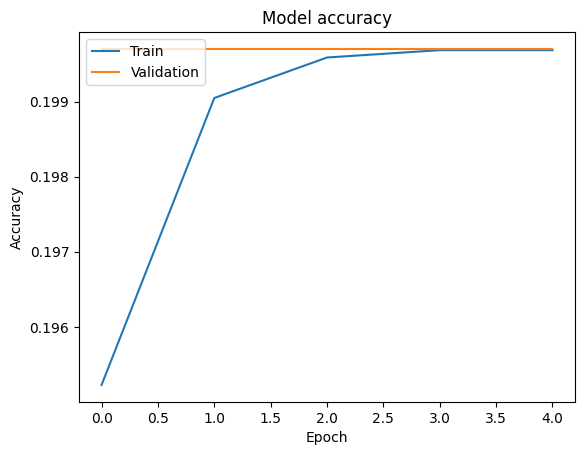

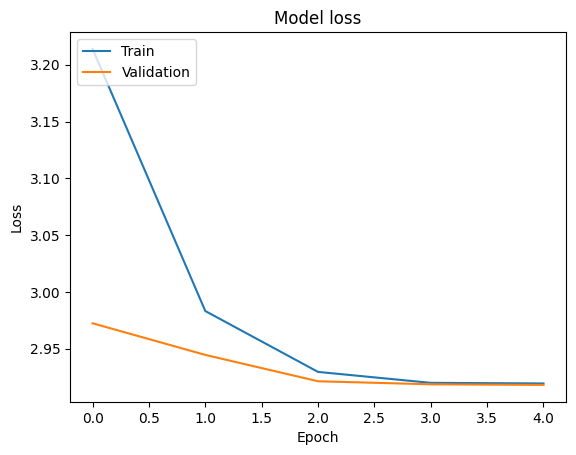

In [12]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()